# Counts black and white pixels in a jpeg and extrapolate points

In [2]:
from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

In [3]:
# Load the images you want to analyze

filenames = [
    r"MASK_SK658 Llobe ch010017.jpg",
    r"MASK_SK658 Llobe ch010019.jpg",
    r"MASK_SK658 Llobe ch010022.jpg",
    r"MASK_SK658 Llobe ch010025.jpg",
    r"MASK_SK658 Llobe ch010031.jpg",
    r"MASK_SK658 Llobe ch010026.jpg",
]

In [4]:
# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [45, 60, 80, 570, 955, 2800]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

imaging_path = r"./data/imaging/"

for filename in filenames:
    img = cv2.imread(imaging_path + filename, 0)
    images.append(img)

In [5]:
# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = 100 * (white_counts[x] / (black_counts[x] + white_counts[x]))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f"{filenames[x]}:", "red"))
    print(f"{white_percents[x]}% White | Depth: {depths[x]} microns")
    print()

Counts of pixel by color in each image
White pixels in image 0: 27561
Black pixels in image 0: 4166743

White pixels in image 1: 31331
Black pixels in image 1: 4162973

White pixels in image 2: 33151
Black pixels in image 2: 4161153

White pixels in image 3: 51040
Black pixels in image 3: 4143264

White pixels in image 4: 59908
Black pixels in image 4: 4134396

White pixels in image 5: 73224
Black pixels in image 5: 4121080

Percent white px:
MASK_SK658 Llobe ch010017.jpg:
0.6571054458618164% White | Depth: 45 microns

MASK_SK658 Llobe ch010019.jpg:
0.7469892501831055% White | Depth: 60 microns

MASK_SK658 Llobe ch010022.jpg:
0.7903814315795898% White | Depth: 80 microns

MASK_SK658 Llobe ch010025.jpg:
1.216888427734375% White | Depth: 570 microns

MASK_SK658 Llobe ch010031.jpg:
1.4283180236816406% White | Depth: 955 microns

MASK_SK658 Llobe ch010026.jpg:
1.7457962036132812% White | Depth: 2800 microns



In [7]:
"""Write your data to a .csv file"""

# Create a DataFrame that includes the filenames, depths, and percentage of white pixels
df = pd.DataFrame(
    {"Filenames": filenames, "Depths": depths, "White percents": white_percents}
)

# Write that DataFrame to a .csv file

# df.to_csv("Percent_White_Pixels_new.csv", index=False)

# print("CSV file 'Percent_White_Pixels_new.csv' has been created.")

"""the .csv writing subroutine ends here"""

# Interpolate a point: given a depth, find the corresponding white pixel percentage

interpolate_depth = float(
    input(
        colored("Enter the depth at which you want to interpolate a point: ", "yellow")
    )
)

x = depths
y = white_percents

i = interp1d(x, y, kind="linear")  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(
    colored(
        f"The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.",
        "green",
    )
)

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

The interpolated point is at the x-coordinate 100.0 and y-coordinate 0.8077898804022341.


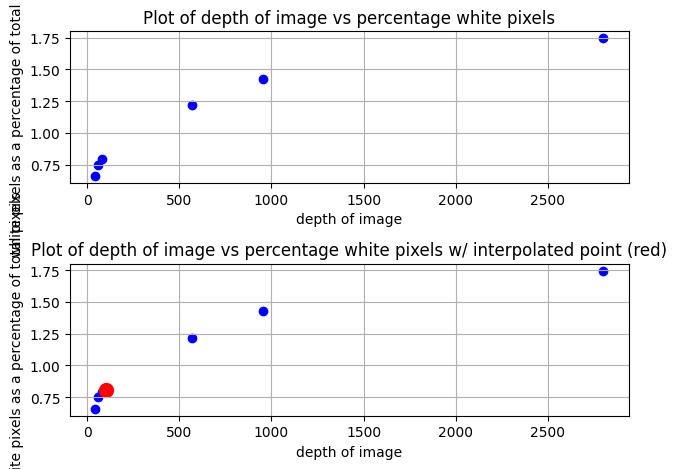

In [8]:
# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker="o", linestyle="-", color="blue")
axs[0].set_title("Plot of depth of image vs percentage white pixels")
axs[0].set_xlabel("depth of image")
axs[0].set_ylabel("white pixels as a percentage of total pixels")
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker="o", linestyle="-", color="blue")
axs[1].set_title(
    "Plot of depth of image vs percentage white pixels w/ interpolated point (red)"
)
axs[1].set_xlabel("depth of image")
axs[1].set_ylabel("white pixels as a percentage of total pixels")
axs[1].grid(True)
axs[1].scatter(
    depths_i[len(depths_i) - 1],
    white_percents_i[len(white_percents_i) - 1],
    color="red",
    s=100,
    label="Highlighted point",
)


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()